In [41]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
df = pd.read_csv('18zpallagi.csv')

df.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,...,0.0,0.0,59030.0,50007.0,669420.0,1732176.0,666750.0,1725286.0,2730.0,4220.0
1,1,AL,0,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,...,0.0,0.0,77300.0,111047.0,424280.0,1230668.0,420960.0,1220934.0,4110.0,9399.0
2,1,AL,0,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,...,0.0,0.0,68920.0,148870.0,205830.0,562490.0,201770.0,550675.0,5790.0,15182.0
3,1,AL,0,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,...,0.0,0.0,47730.0,136776.0,126560.0,403410.0,122610.0,388967.0,3730.0,13784.0
4,1,AL,0,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,...,50.0,58.0,98980.0,446992.0,145780.0,598498.0,137120.0,521691.0,9850.0,65917.0


In [7]:
# Drop variables.

# We will drop columns which are not required in our models.
# Because Python keep memory at high watermark, we will modify our dataframe with inplace=True instead of create copies:

df.drop(['STATEFIPS', 'PREP', 'DIR_DEP', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAC', 'N00300', 'A00300', 'N00600', 
         'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01750', 'A01750', 
         'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 
         'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210', 'N04450', 'A04450', 'N04100', 'A04100', 
         'N04200', 'A04200', 'N04470', 'A04470', 'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 
         'N18500', 'A18500', 'N18800', 'A18800', 'N18460', 'A18460', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 
         'A19500', 'N19530', 'A19530', 'N19570', 'A19570', 'N19700', 'A19700', 'N20950', 'A20950', 'N04475', 'A04475', 
         'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600', 'N05780', 'A05780', 'N07300', 'A07300', 'N07230', 
         'A07230', 'N07240', 'A07240', 'N07225', 'A07225', 'N07260', 'A07260', 'N09400', 'A09400', 'N85770', 'A85770', 
         'N85775', 'A85775', 'N09750', 'A09750', 'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070', 'N10960', 
         'A10960', 'N11560', 'A11560', 'N06500', 'A06500', 'N85530', 'A85530', 'N85300', 'A85300', 'N11901', 'A11901', 
         'N11902', 'A11902', 'N12000', 'A12000'], axis=1, inplace=True)

In [8]:
names = ['state', 'zipcode', 
              'agi_range', 'returns_cnt', 
              'single', 'joint', 'head', 
              'efile', 'paper', 
              'exemption_cnt', 'dependent_cnt', 
              'elderly', 
              'agi', 
              'withincome_cnt', 'income_amount',
              'withwages_cnt', 'wages_amount',
              'farmer',
              'withcredits_cnt', 'credits_amount', 
              'withchildcredits_cnt', 'childcredits_amount', 
              'withpayments_cnt', 'payments_amount', 
              'withliability_cnt', 'liability_amount', 
              'withoverpayment_cnt', 'overpayment_amount']

In [9]:
df.columns = names
df.head()

,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,...,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount
0,AL,0,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,1180240.0,...,138350.0,48039.0,7130.0,2561.0,705730.0,1956009.0,298790.0,272245.0,669420.0,1732176.0
1,AL,0,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,977450.0,...,252860.0,306377.0,30100.0,18147.0,490520.0,1960001.0,376800.0,834109.0,424280.0,1230668.0
2,AL,0,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,587740.0,...,127700.0,284052.0,17330.0,9633.0,270000.0,1599388.0,253380.0,1178827.0,205830.0,562490.0
3,AL,0,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,429360.0,...,83340.0,234812.0,14600.0,8500.0,172760.0,1521941.0,171510.0,1250551.0,126560.0,403410.0
4,AL,0,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,665630.0,...,134730.0,386690.0,23670.0,13839.0,242910.0,3980479.0,244190.0,3827935.0,145780.0,598498.0


In [42]:
df2 = df.sample(1000)
df2.head()

,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,...,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount
12215,CA,93210,1,1820.0,1190.0,210.0,410.0,1620.0,100.0,3070.0,...,380.0,157.0,0.0,0.0,1690.0,4388.0,650.0,568.0,1580.0,3940.0
24529,FL,33181,4,530.0,250.0,200.0,60.0,460.0,50.0,960.0,...,200.0,413.0,0.0,0.0,510.0,5489.0,530.0,4927.0,360.0,1235.0
131002,SC,29154,2,3650.0,1550.0,940.0,990.0,3350.0,150.0,7230.0,...,1920.0,2359.0,240.0,147.0,3590.0,13844.0,2690.0,5649.0,3050.0,8885.0
145347,TX,78580,4,190.0,40.0,120.0,30.0,160.0,30.0,500.0,...,100.0,308.0,20.0,17.0,190.0,1785.0,190.0,1373.0,140.0,584.0
156828,WA,98664,1,3150.0,2350.0,370.0,390.0,2750.0,220.0,4110.0,...,460.0,158.0,0.0,0.0,2780.0,5505.0,1440.0,1267.0,2610.0,4502.0


Size: (1000, 28)
            zipcode   agi_range    returns_cnt         single          joint  \
count   1000.000000  1000.00000    1000.000000    1000.000000    1000.000000   
mean   49184.192000     3.39000    1705.050000     728.110000     718.830000   
std    28045.786812     1.72246   16071.826673    5835.900844    9008.196175   
min        0.000000     1.00000       0.000000       0.000000       0.000000   
25%    25748.000000     2.00000      80.000000      20.000000      40.000000   
50%    49443.000000     3.00000     270.000000      80.000000     120.000000   
75%    72540.250000     5.00000    1060.000000     400.000000     410.000000   
max    99999.000000     6.00000  451080.000000  171000.000000  215610.000000   

               head          efile         paper  exemption_cnt  \
count   1000.000000    1000.000000   1000.000000    1000.000000   
mean     221.900000    1542.890000     87.900000    3482.070000   
std     1894.945859   14796.997611    662.514389   36609.3685

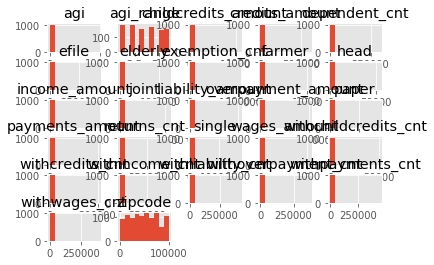

In [12]:
print("Size: {}".format(df2.shape))
print(df2.describe())
df2.hist()
plt.show()

In [13]:
# libraries for model comparison

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [120]:
#df.sample(frac=0.12, random_state=19)


,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,...,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount
59384,ME,3903,1,930.0,760.0,100.0,60.0,780.0,80.0,850.0,...,70.0,23.0,0.0,0.0,810.0,1120.0,360.0,361.0,760.0,855.0
15650,CA,95457,5,150.0,40.0,130.0,0.0,130.0,0.0,330.0,...,70.0,235.0,0.0,0.0,140.0,2267.0,150.0,2412.0,80.0,335.0
109838,ND,58490,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125726,PA,17006,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42448,IN,47022,1,470.0,390.0,60.0,40.0,400.0,60.0,370.0,...,40.0,15.0,0.0,0.0,410.0,511.0,160.0,128.0,390.0,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,AZ,86401,2,2920.0,1270.0,980.0,620.0,2660.0,110.0,5720.0,...,1310.0,1546.0,110.0,65.0,2820.0,10746.0,2220.0,4703.0,2410.0,6617.0
30057,GA,31211,6,100.0,0.0,90.0,0.0,90.0,0.0,260.0,...,60.0,197.0,0.0,0.0,100.0,5765.0,100.0,6153.0,40.0,601.0
122645,PA,15239,3,1680.0,690.0,750.0,170.0,1490.0,100.0,3290.0,...,690.0,1428.0,60.0,26.0,1670.0,11031.0,1590.0,7841.0,1370.0,3650.0
29229,GA,30667,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
#train = df.sample(frac=0.12, random_state=19)
# you can't simply split 0.75 and 0.25 without overlapping
# this code tries to find that train = 75% and test = 25%
#test = df.loc[~df.index.isin(train.index), :]

In [14]:

seed = 7
X_final = df2[['agi', 'income_amount', 'wages_amount', 'credits_amount', 'childcredits_amount']]
y_final = df2['liability_amount']
X_train, X_test, y_train, y_test = train_test_split(X_final, 
                                                    y_final, 
                                                    test_size = 0.33,)
kfold = model_selection.KFold(n_splits=5, shuffle=False, random_state=seed)




C:\Users\brigg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Resource:  https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [17]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.086567 (0.015367)
LDA: 0.085075 (0.013012)
KNN: 0.088060 (0.014471)
CART: 0.089552 (0.013350)
NB: 0.088060 (0.020789)
SVM: 0.086567 (0.015367)


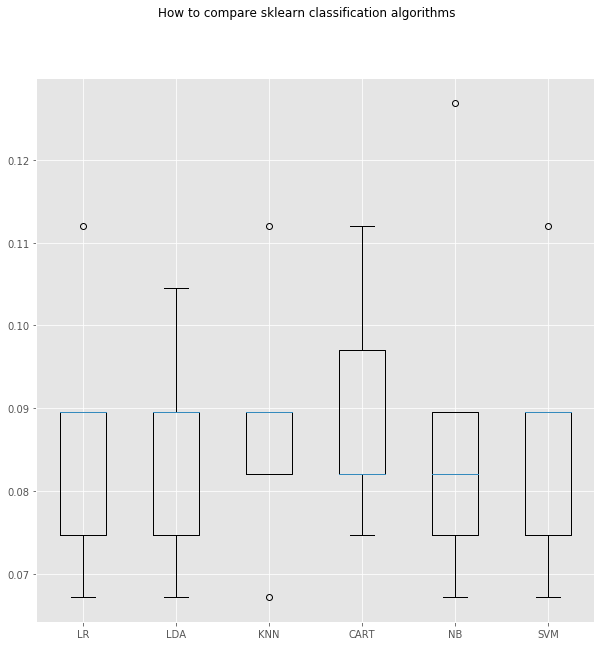

In [18]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Linear Regression was conducted in Taxes Jupyter Notebook and looking at the comparison of algorithms it looks like CART or NB may need a closer look at predicting taxes. 

In [44]:
# Importing all needed libraries to create NB algorithm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

In [45]:
df2.head(5)

,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,...,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount
12215,CA,93210,1,1820.0,1190.0,210.0,410.0,1620.0,100.0,3070.0,...,380.0,157.0,0.0,0.0,1690.0,4388.0,650.0,568.0,1580.0,3940.0
24529,FL,33181,4,530.0,250.0,200.0,60.0,460.0,50.0,960.0,...,200.0,413.0,0.0,0.0,510.0,5489.0,530.0,4927.0,360.0,1235.0
131002,SC,29154,2,3650.0,1550.0,940.0,990.0,3350.0,150.0,7230.0,...,1920.0,2359.0,240.0,147.0,3590.0,13844.0,2690.0,5649.0,3050.0,8885.0
145347,TX,78580,4,190.0,40.0,120.0,30.0,160.0,30.0,500.0,...,100.0,308.0,20.0,17.0,190.0,1785.0,190.0,1373.0,140.0,584.0
156828,WA,98664,1,3150.0,2350.0,370.0,390.0,2750.0,220.0,4110.0,...,460.0,158.0,0.0,0.0,2780.0,5505.0,1440.0,1267.0,2610.0,4502.0


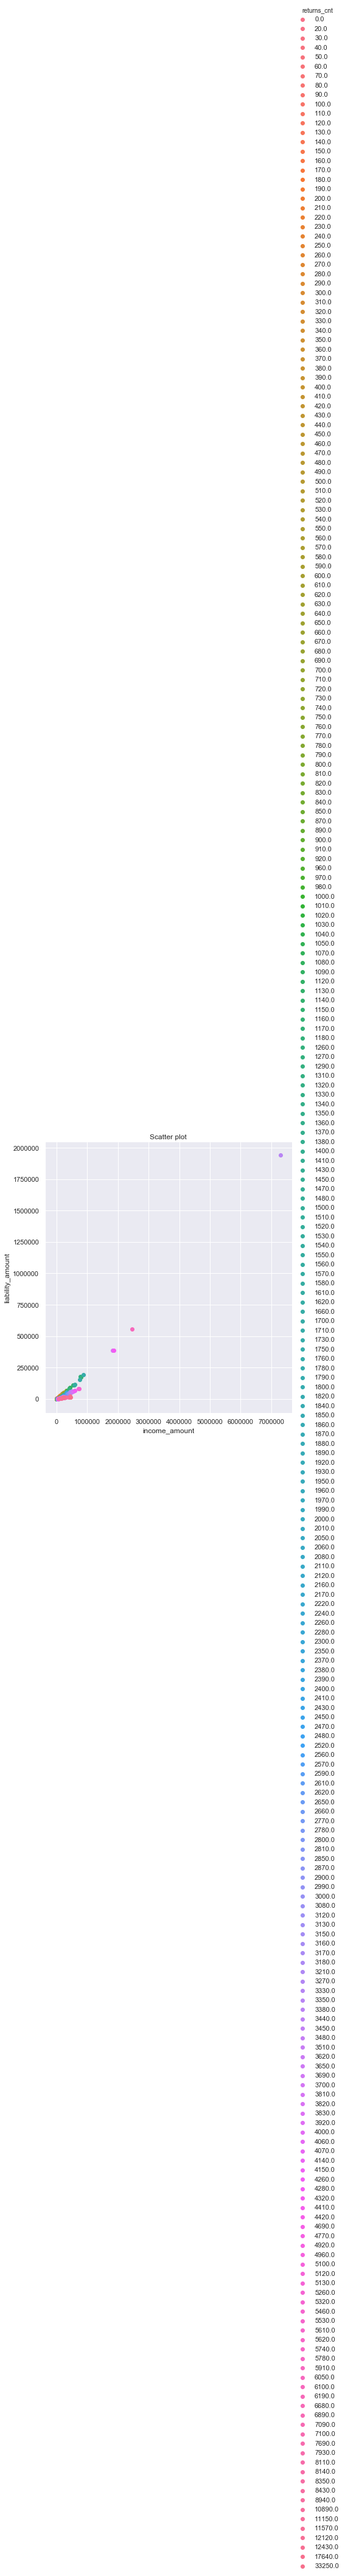

In [63]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(df2, hue="returns_cnt", size=7) .map(plt.scatter,"income_amount", "liability_amount", )  .add_legend()
plt.title('Scatter plot')
df3 = df2[["income_amount", "liability_amount",'returns_cnt']]

#'agi', 'income_amount', 'wages_amount', 'credits_amount', 'childcredits_amount'

In [64]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

C:\Users\brigg\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\brigg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\brigg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: No contour levels were found within the data range.


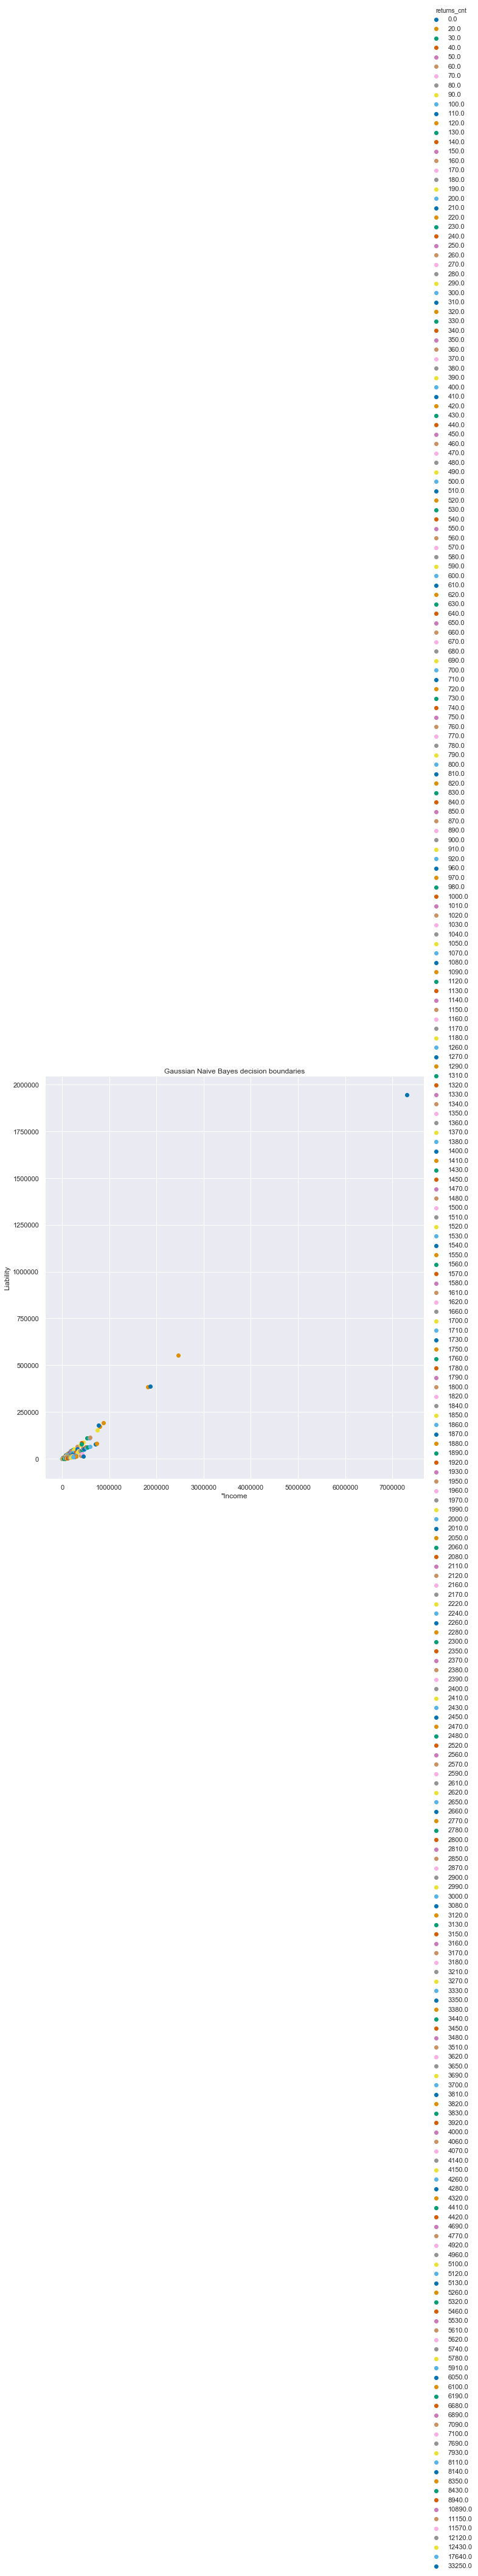

In [72]:
#Estimating the parameters
mu_list = np.split(df3.groupby('returns_cnt').mean().values,[1,2])
std_list = np.split(df3.groupby('returns_cnt').std().values,[1,2], axis = 0)
pi_list = df3.iloc[:,2].value_counts().values / len(df3)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df2, hue="returns_cnt", size=10, palette = 'colorblind') .map(plt.scatter, "income_amount", "liability_amount",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('"Income')
my_ax.set_ylabel('Liability')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

In [85]:
#Numpy accuracy
y_pred = np.array([predict_NB_gaussian_class(np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list)]

SyntaxError: unexpected EOF while parsing (<ipython-input-85-f7161f0bd391>, line 2)

In [70]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df2.iloc[:,0:4]
y_labels = df2.iloc[:,4]

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)


# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df2, hue="agi_range", size=10, palette = 'colorblind') .map(plt.scatter, 'payments_amount', 'liability_amount',)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Payments')
my_ax.set_ylabel('Liability')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

ValueError: could not convert string to float: 'CA'

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')